In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder,label_binarize
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("emotions.csv")

In [3]:
data.shape

(2132, 2549)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [5]:
data.isna().sum().sum()

0

In [6]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [7]:
data_new= pd.get_dummies(data, columns = ['label'])


In [8]:
data_new

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,1,0,0
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,0,1,0
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,0,0,1
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,0,0,1
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,0,1,0
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,0,0,1
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,1,0,0
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,1,0,0


In [9]:
X=data_new.loc[:,'# mean_0_a':'fft_749_b']
X.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [10]:
y=data_new.loc[:,'label_NEGATIVE':'label_POSITIVE']
y.head()

,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [11]:
X=X.values
y=y.values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [14]:
X_train.shape

(1279, 2548)

In [15]:
model = KNeighborsClassifier()

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred=model.predict(X_test)

In [18]:
train_acc=model.score(X_train,y_train)
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 78.655%


In [19]:
test_acc=model.score(X_test,y_test)
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 72.795%


In [20]:
val_acc=model.score(X_val,y_val)
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 70.312%


In [21]:
train_scores = model.score(X_train, y_train)
val_scores = model.score(X_val, y_val)
test_scores = model.score(X_test,y_test)

print("Training Accuracy: %.2f%%"%(train_scores * 100))
print("Validation Accuracy: %.2f%%"%(val_scores * 100))
print("Testing Accuracy: %.2f%%"%(test_scores * 100))

Training Accuracy: 78.66%
Validation Accuracy: 70.31%
Testing Accuracy: 72.80%


In [22]:
y_pred

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [23]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [24]:
y_pred[12]

array([1, 0, 0], dtype=uint8)

In [25]:
y_test[12]

array([1, 0, 0], dtype=uint8)

In [26]:
y_test1=np.argmax(y_test, axis=1)

In [27]:
y_pred1=np.argmax(y_pred,axis=1)

In [28]:
y_pred_train=model.predict(X_train)

In [29]:
y_pred_val=model.predict(X_val)

In [30]:
y_new=model.predict(X)

In [31]:
confusion_matrix(y_test1,y_pred1)

array([[162,   0,  17],
       [  2, 143,  33],
       [ 35,  58,  83]], dtype=int64)

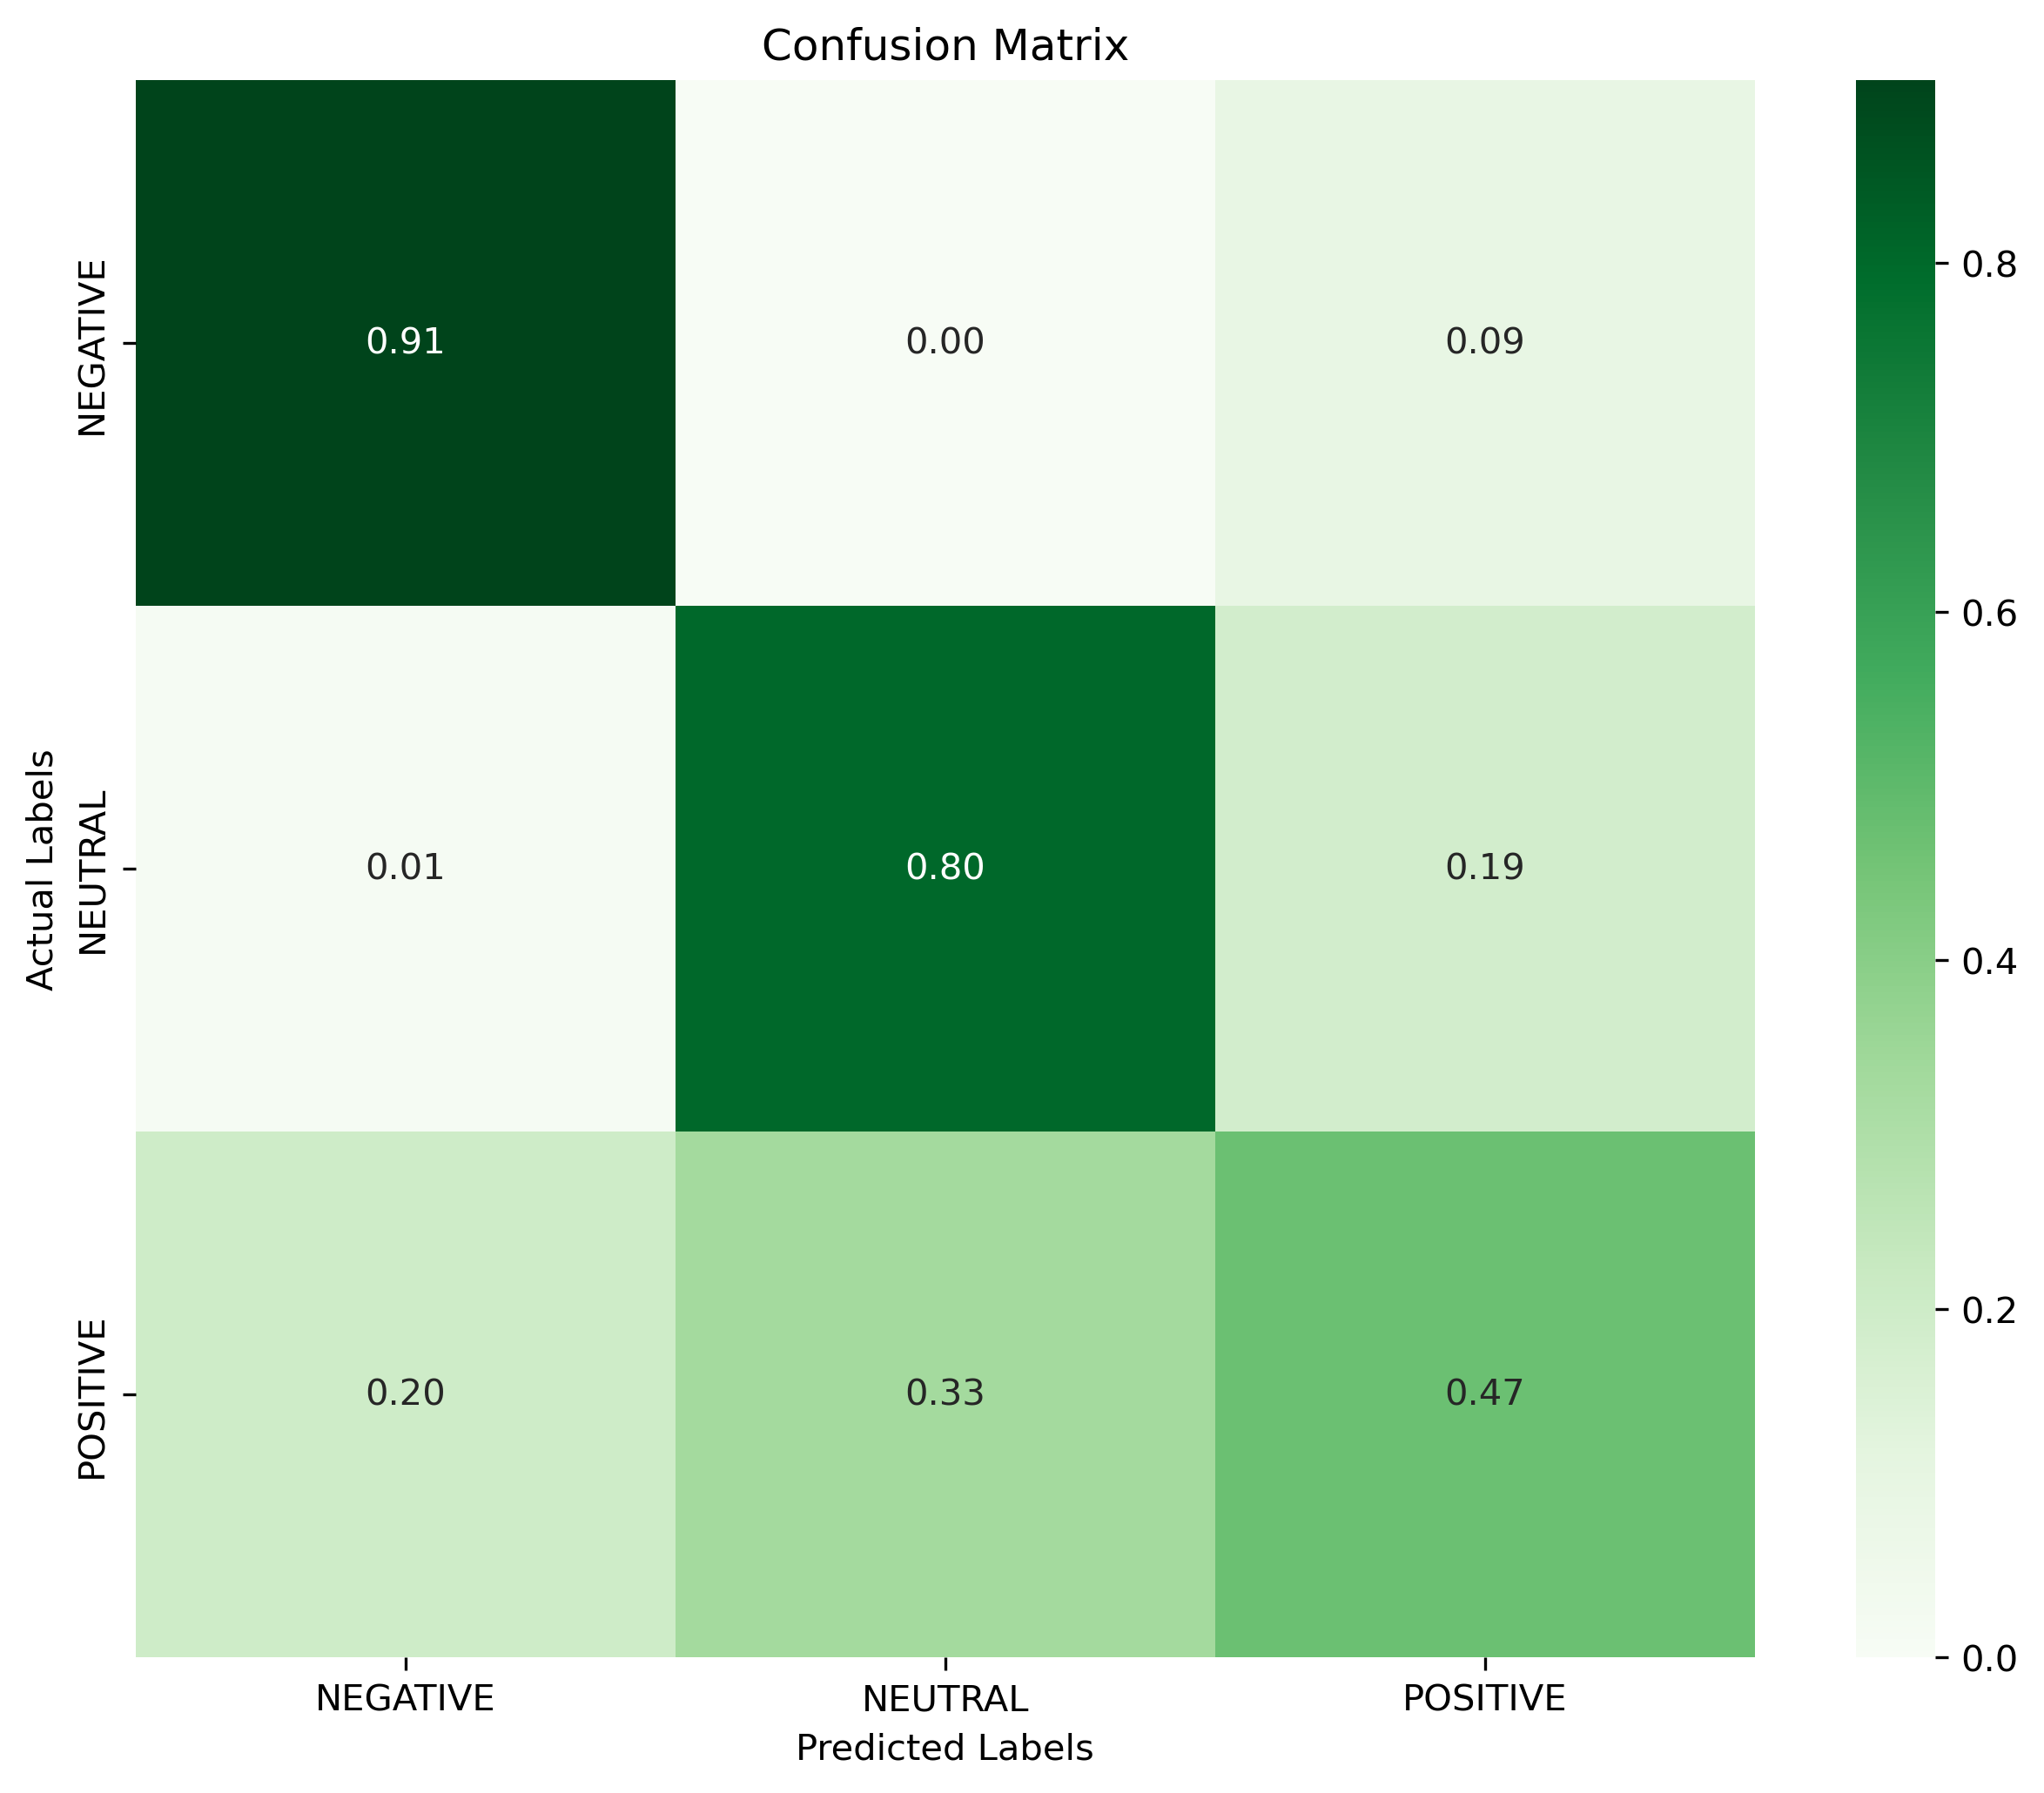

In [32]:
test= np.argmax(y_test, axis=1)
pred= np.argmax(y_pred, axis=1)
conf_matr = confusion_matrix(test, pred)

CLASSES=['NEGATIVE','NEUTRAL','POSITIVE']
cmn = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)

ax=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens',xticklabels= CLASSES,
                yticklabels=CLASSES)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.figure.savefig('confmatrix.png',dpi=300,format='png')

In [33]:
print("classification_report\n",classification_report(y_test1,y_pred1))

classification_report
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       179
           1       0.71      0.80      0.75       178
           2       0.62      0.47      0.54       176

    accuracy                           0.73       533
   macro avg       0.72      0.73      0.72       533
weighted avg       0.72      0.73      0.72       533



In [34]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred,multi_class='ovo')

In [35]:
auc

0.796280544662063

In [36]:
new_pred=label_binarize(y_pred1,classes=np.unique(y_pred1))
classes=np.unique(y_pred1)

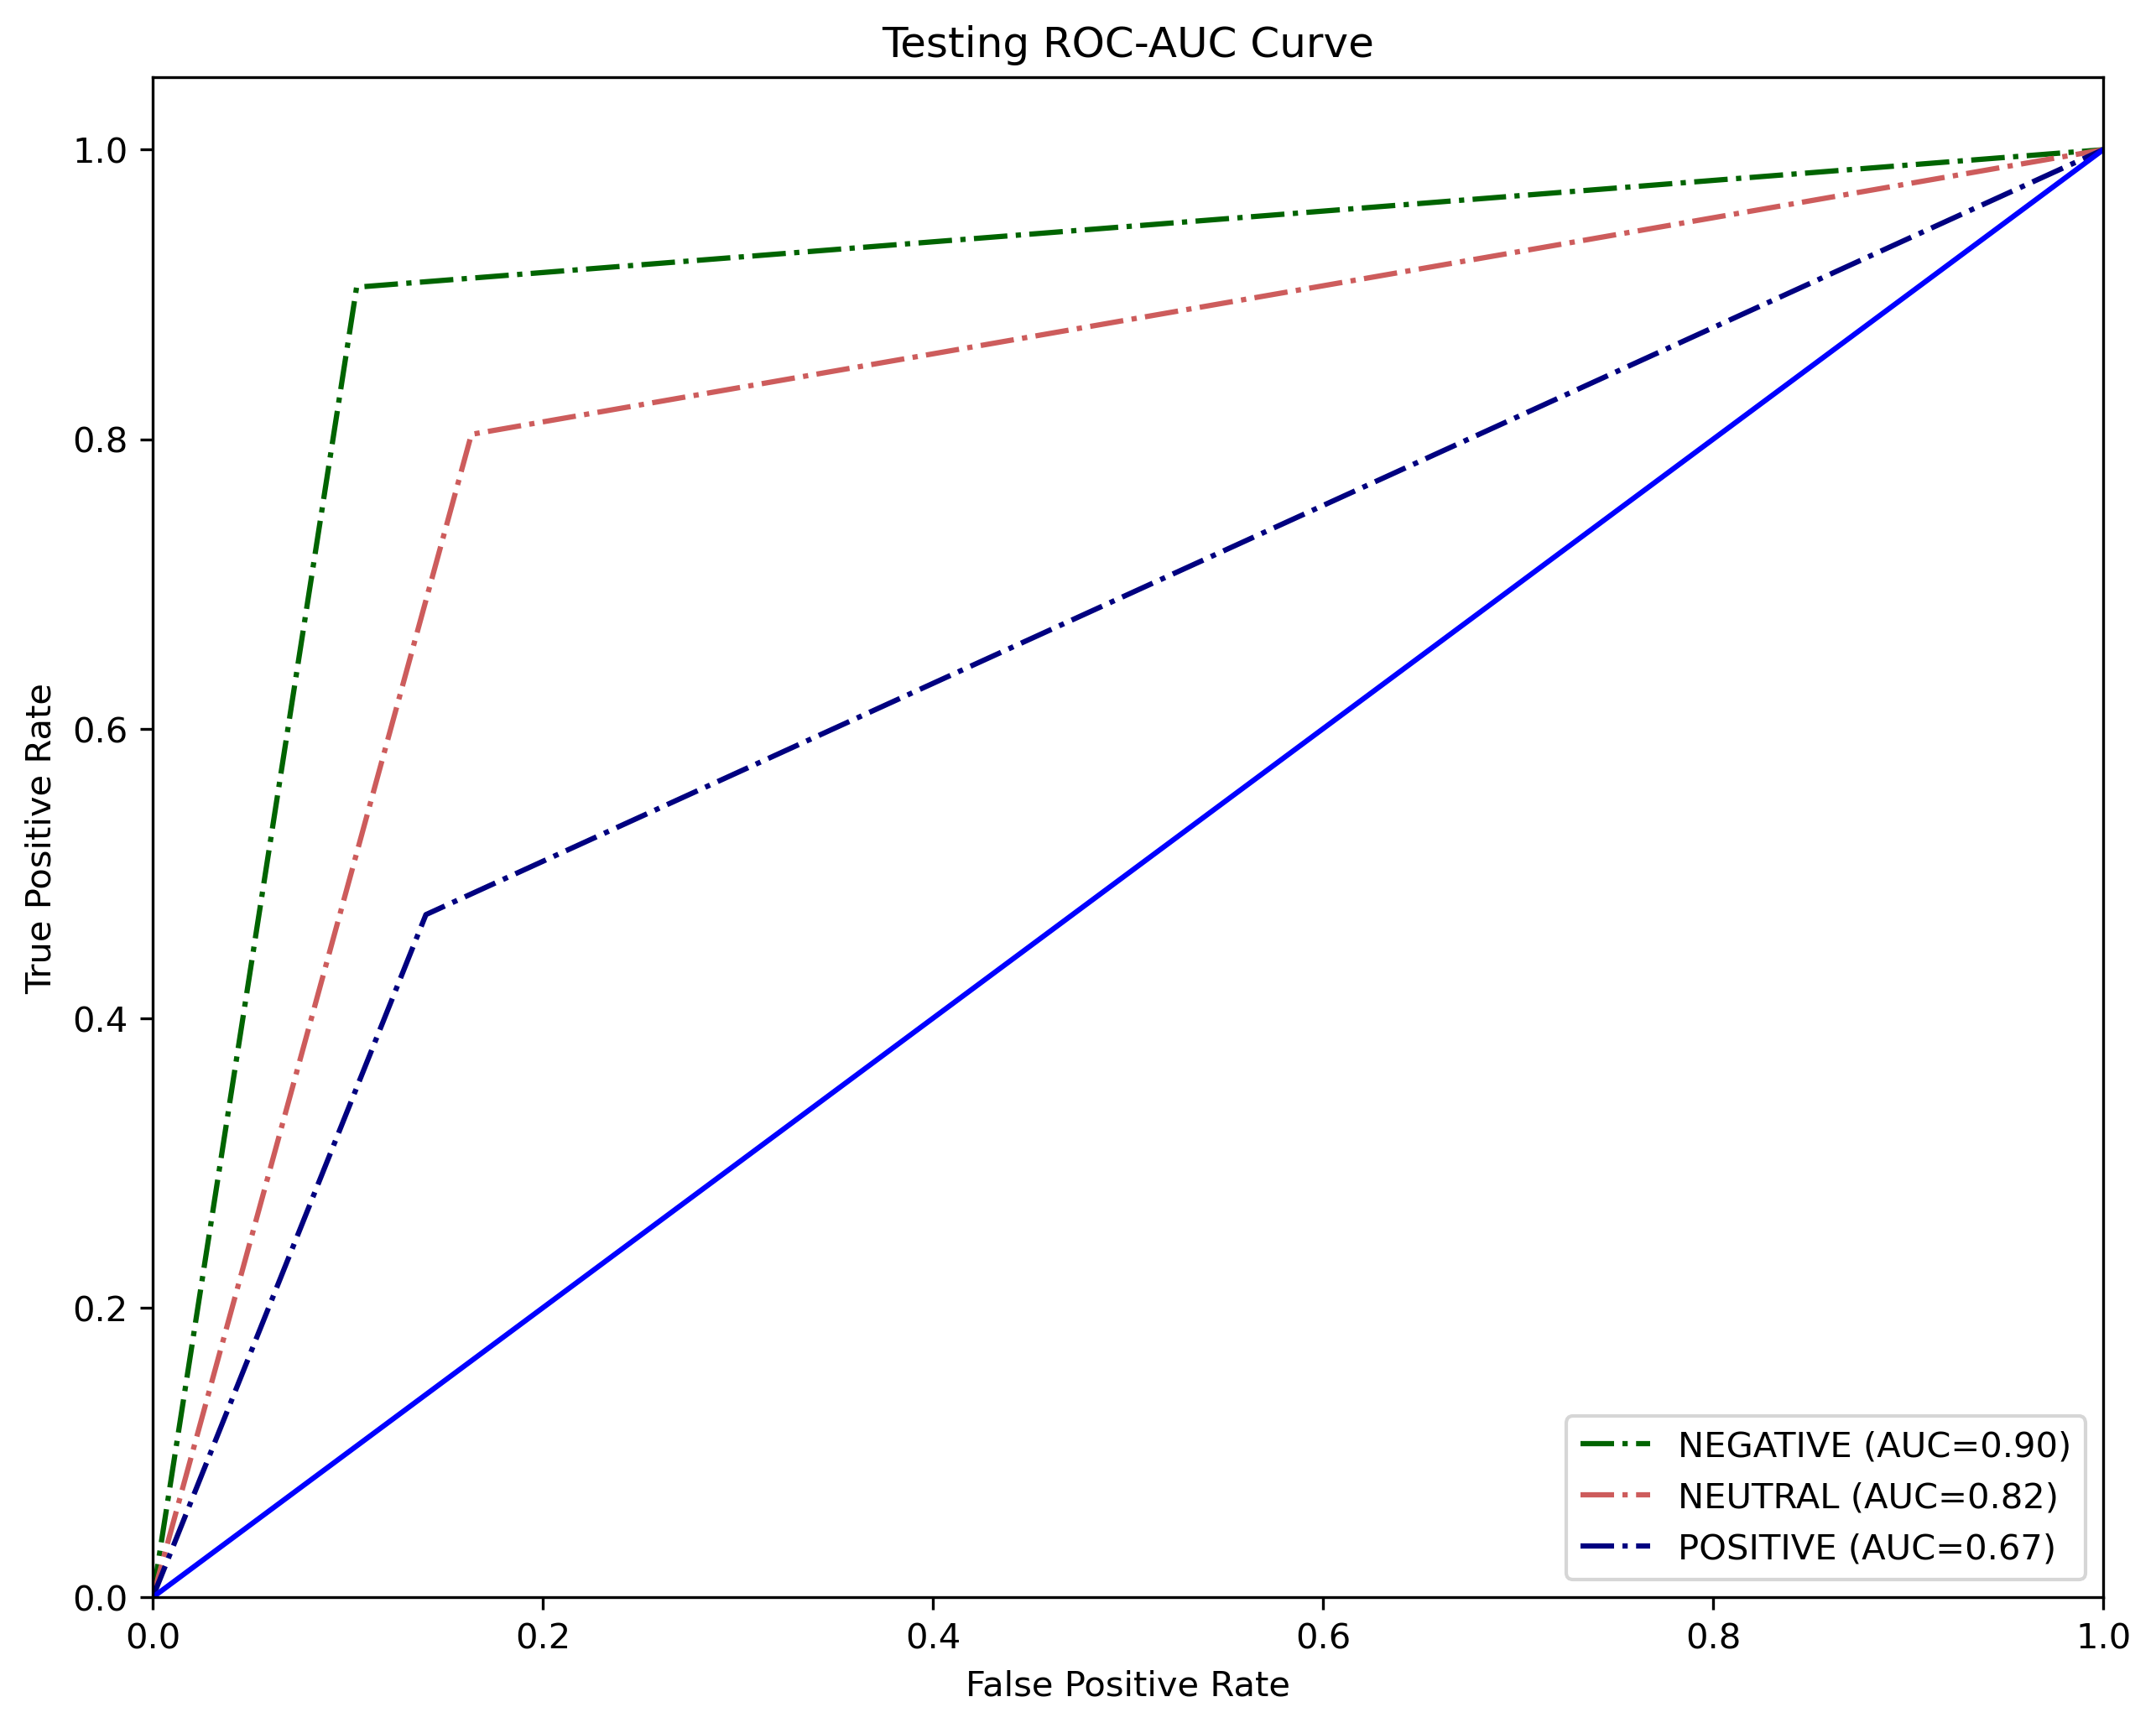

In [37]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10,8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_test[:,i],new_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Testing ROCAUC.png',dpi=300)

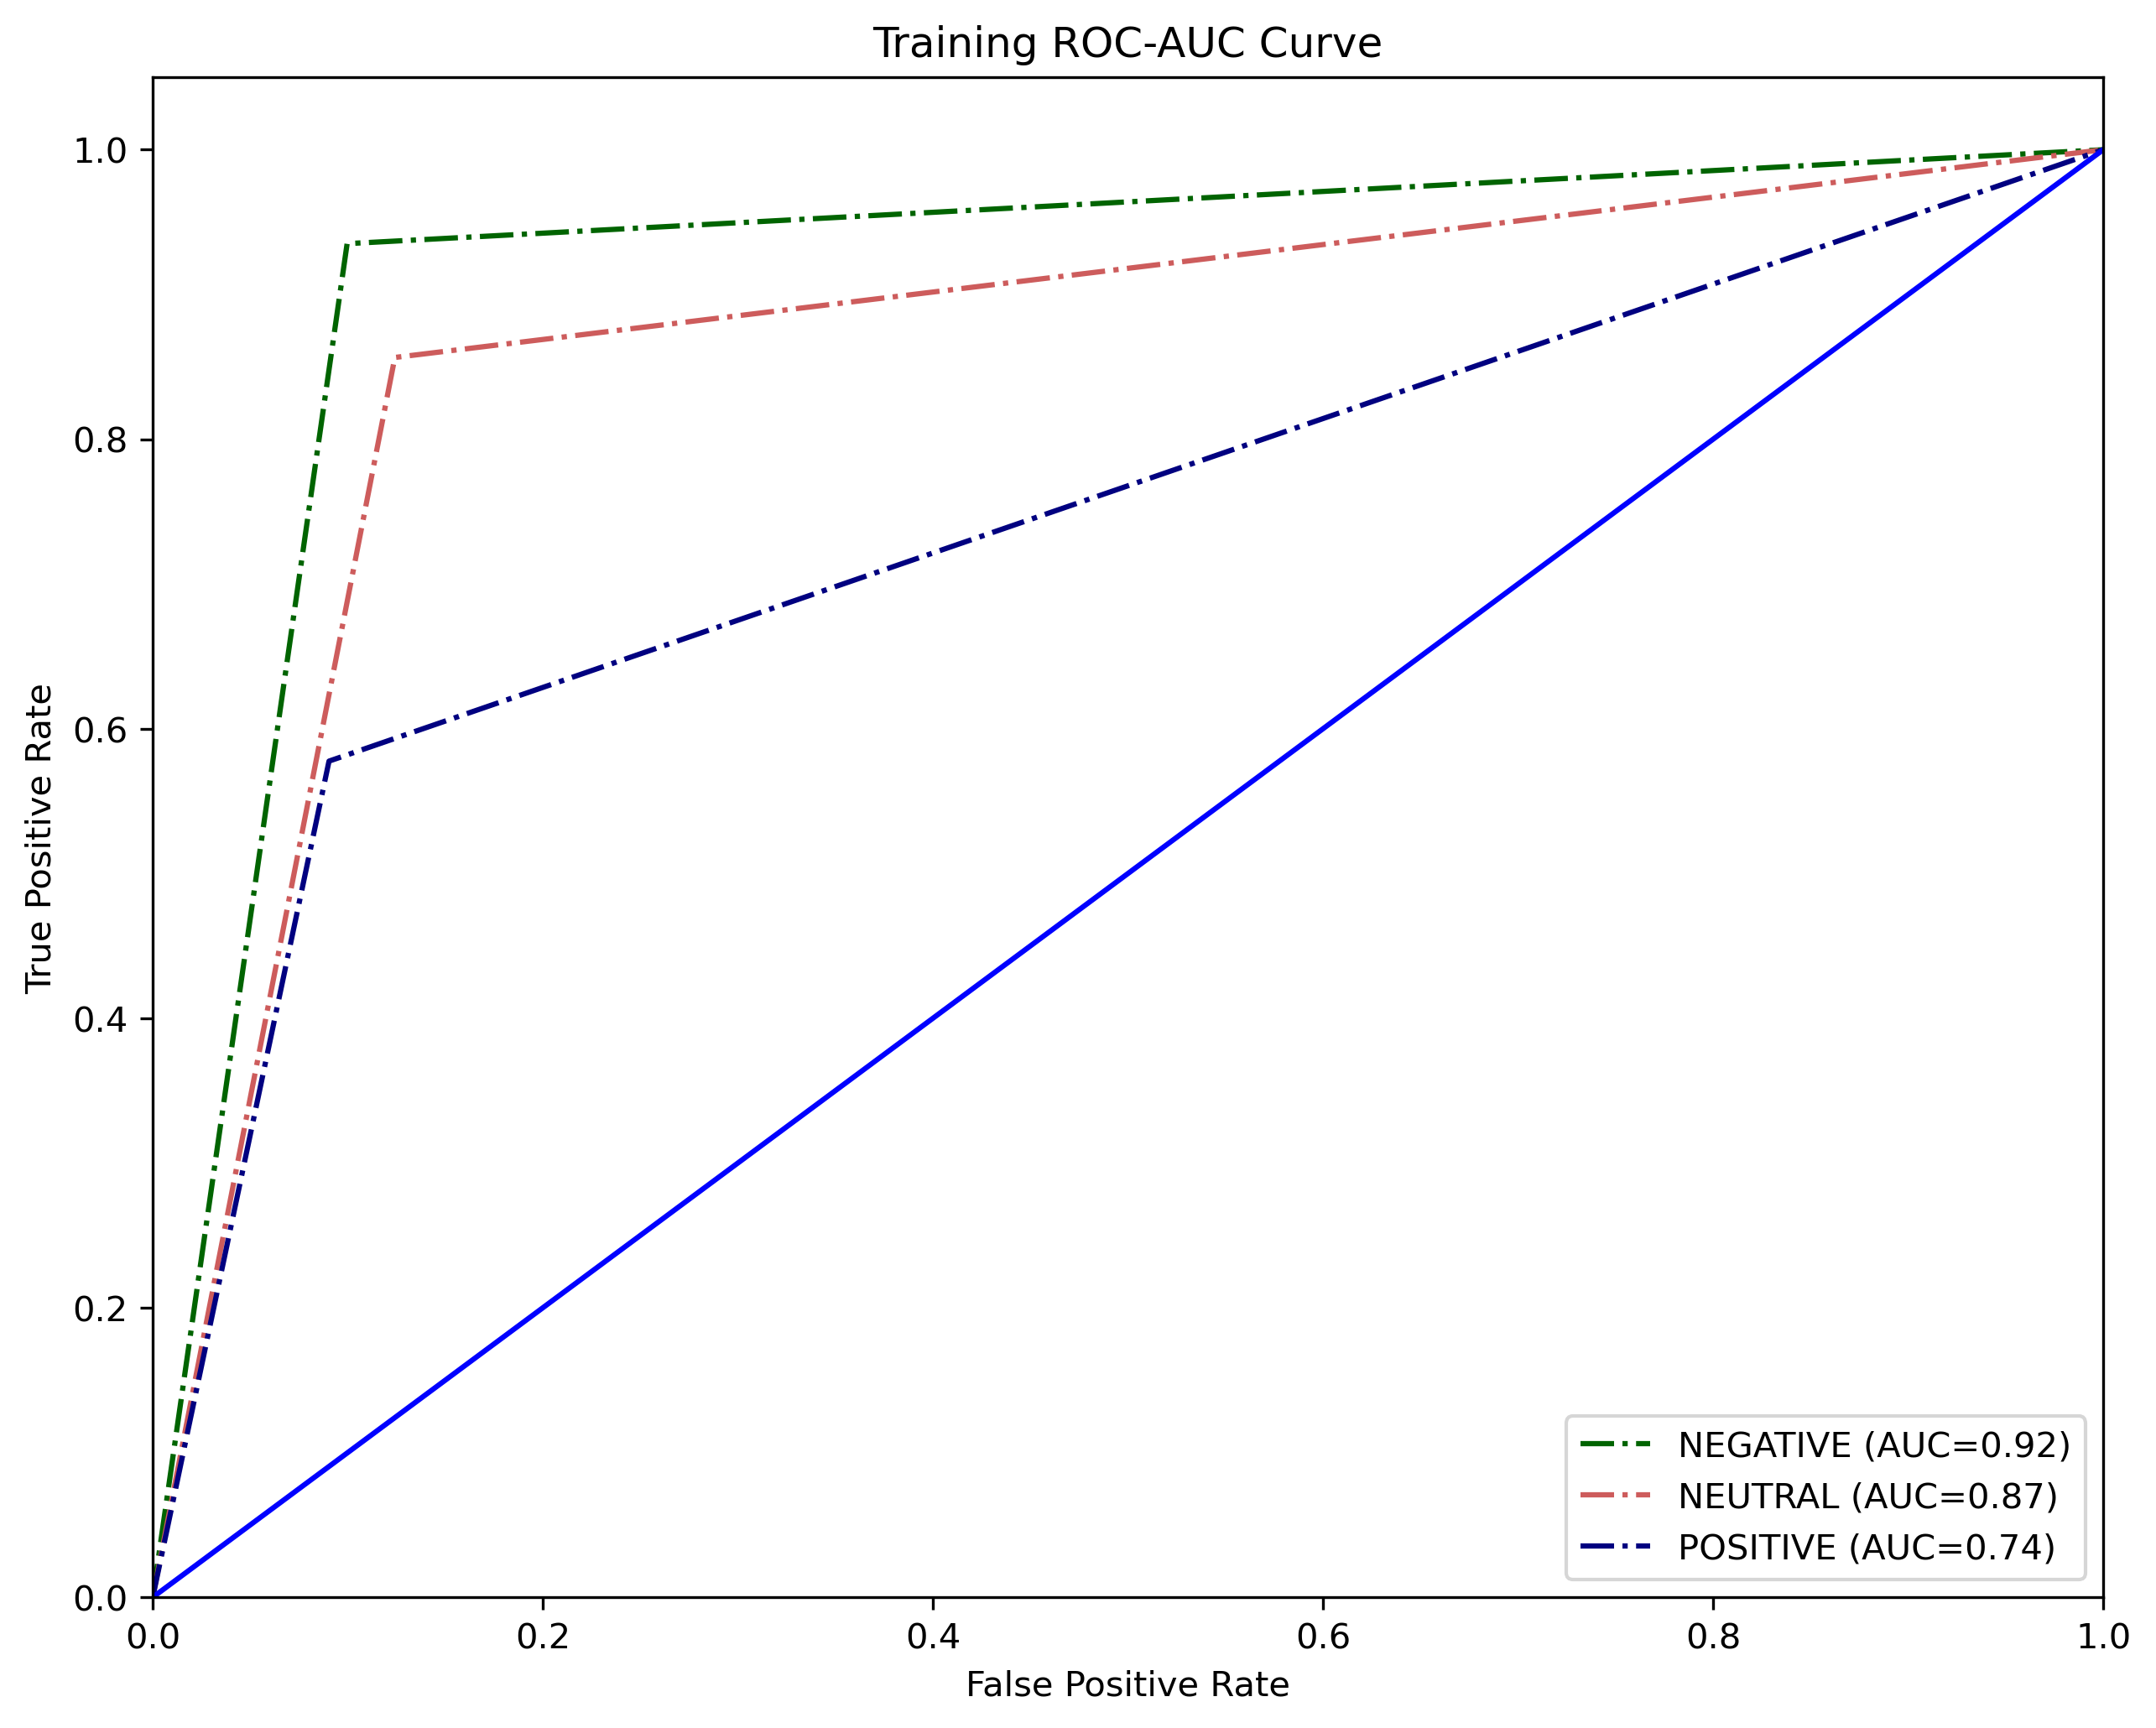

In [38]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_train[:,i],y_pred_train[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Training ROCAUC.png',dpi=300)

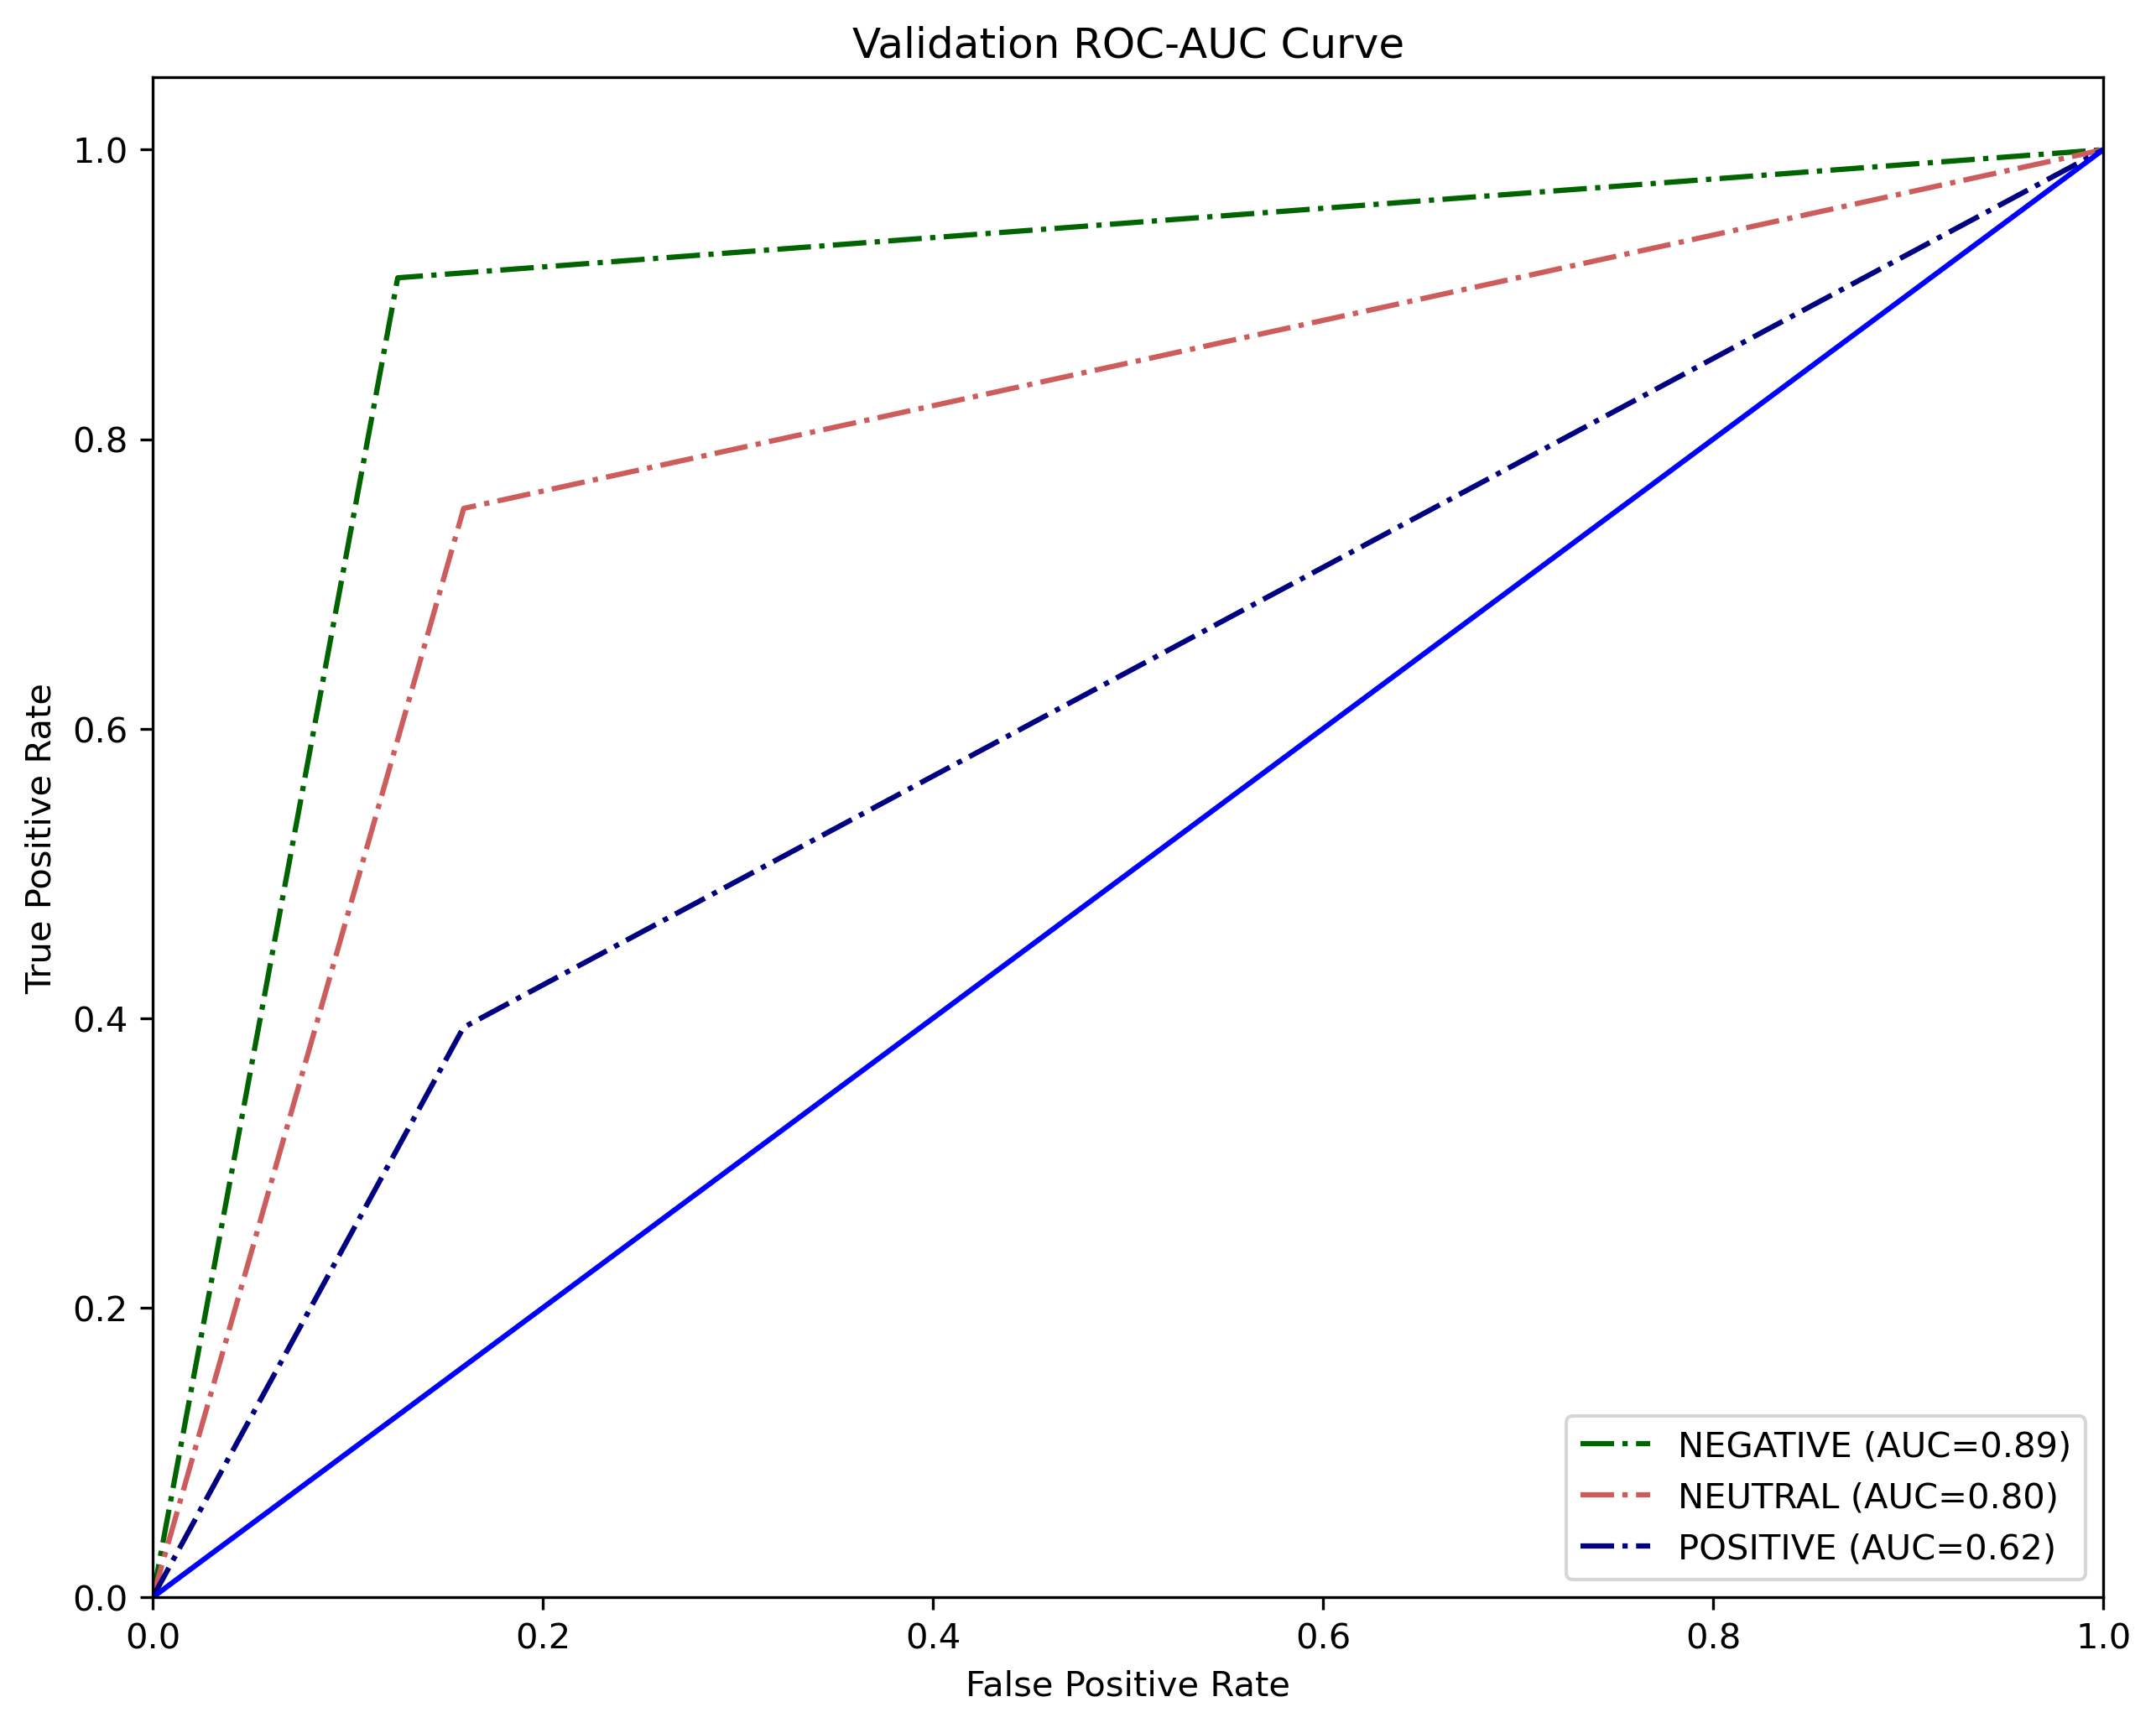

In [39]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_val[:,i],y_pred_val[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Validation ROCAUC.png',dpi=300)

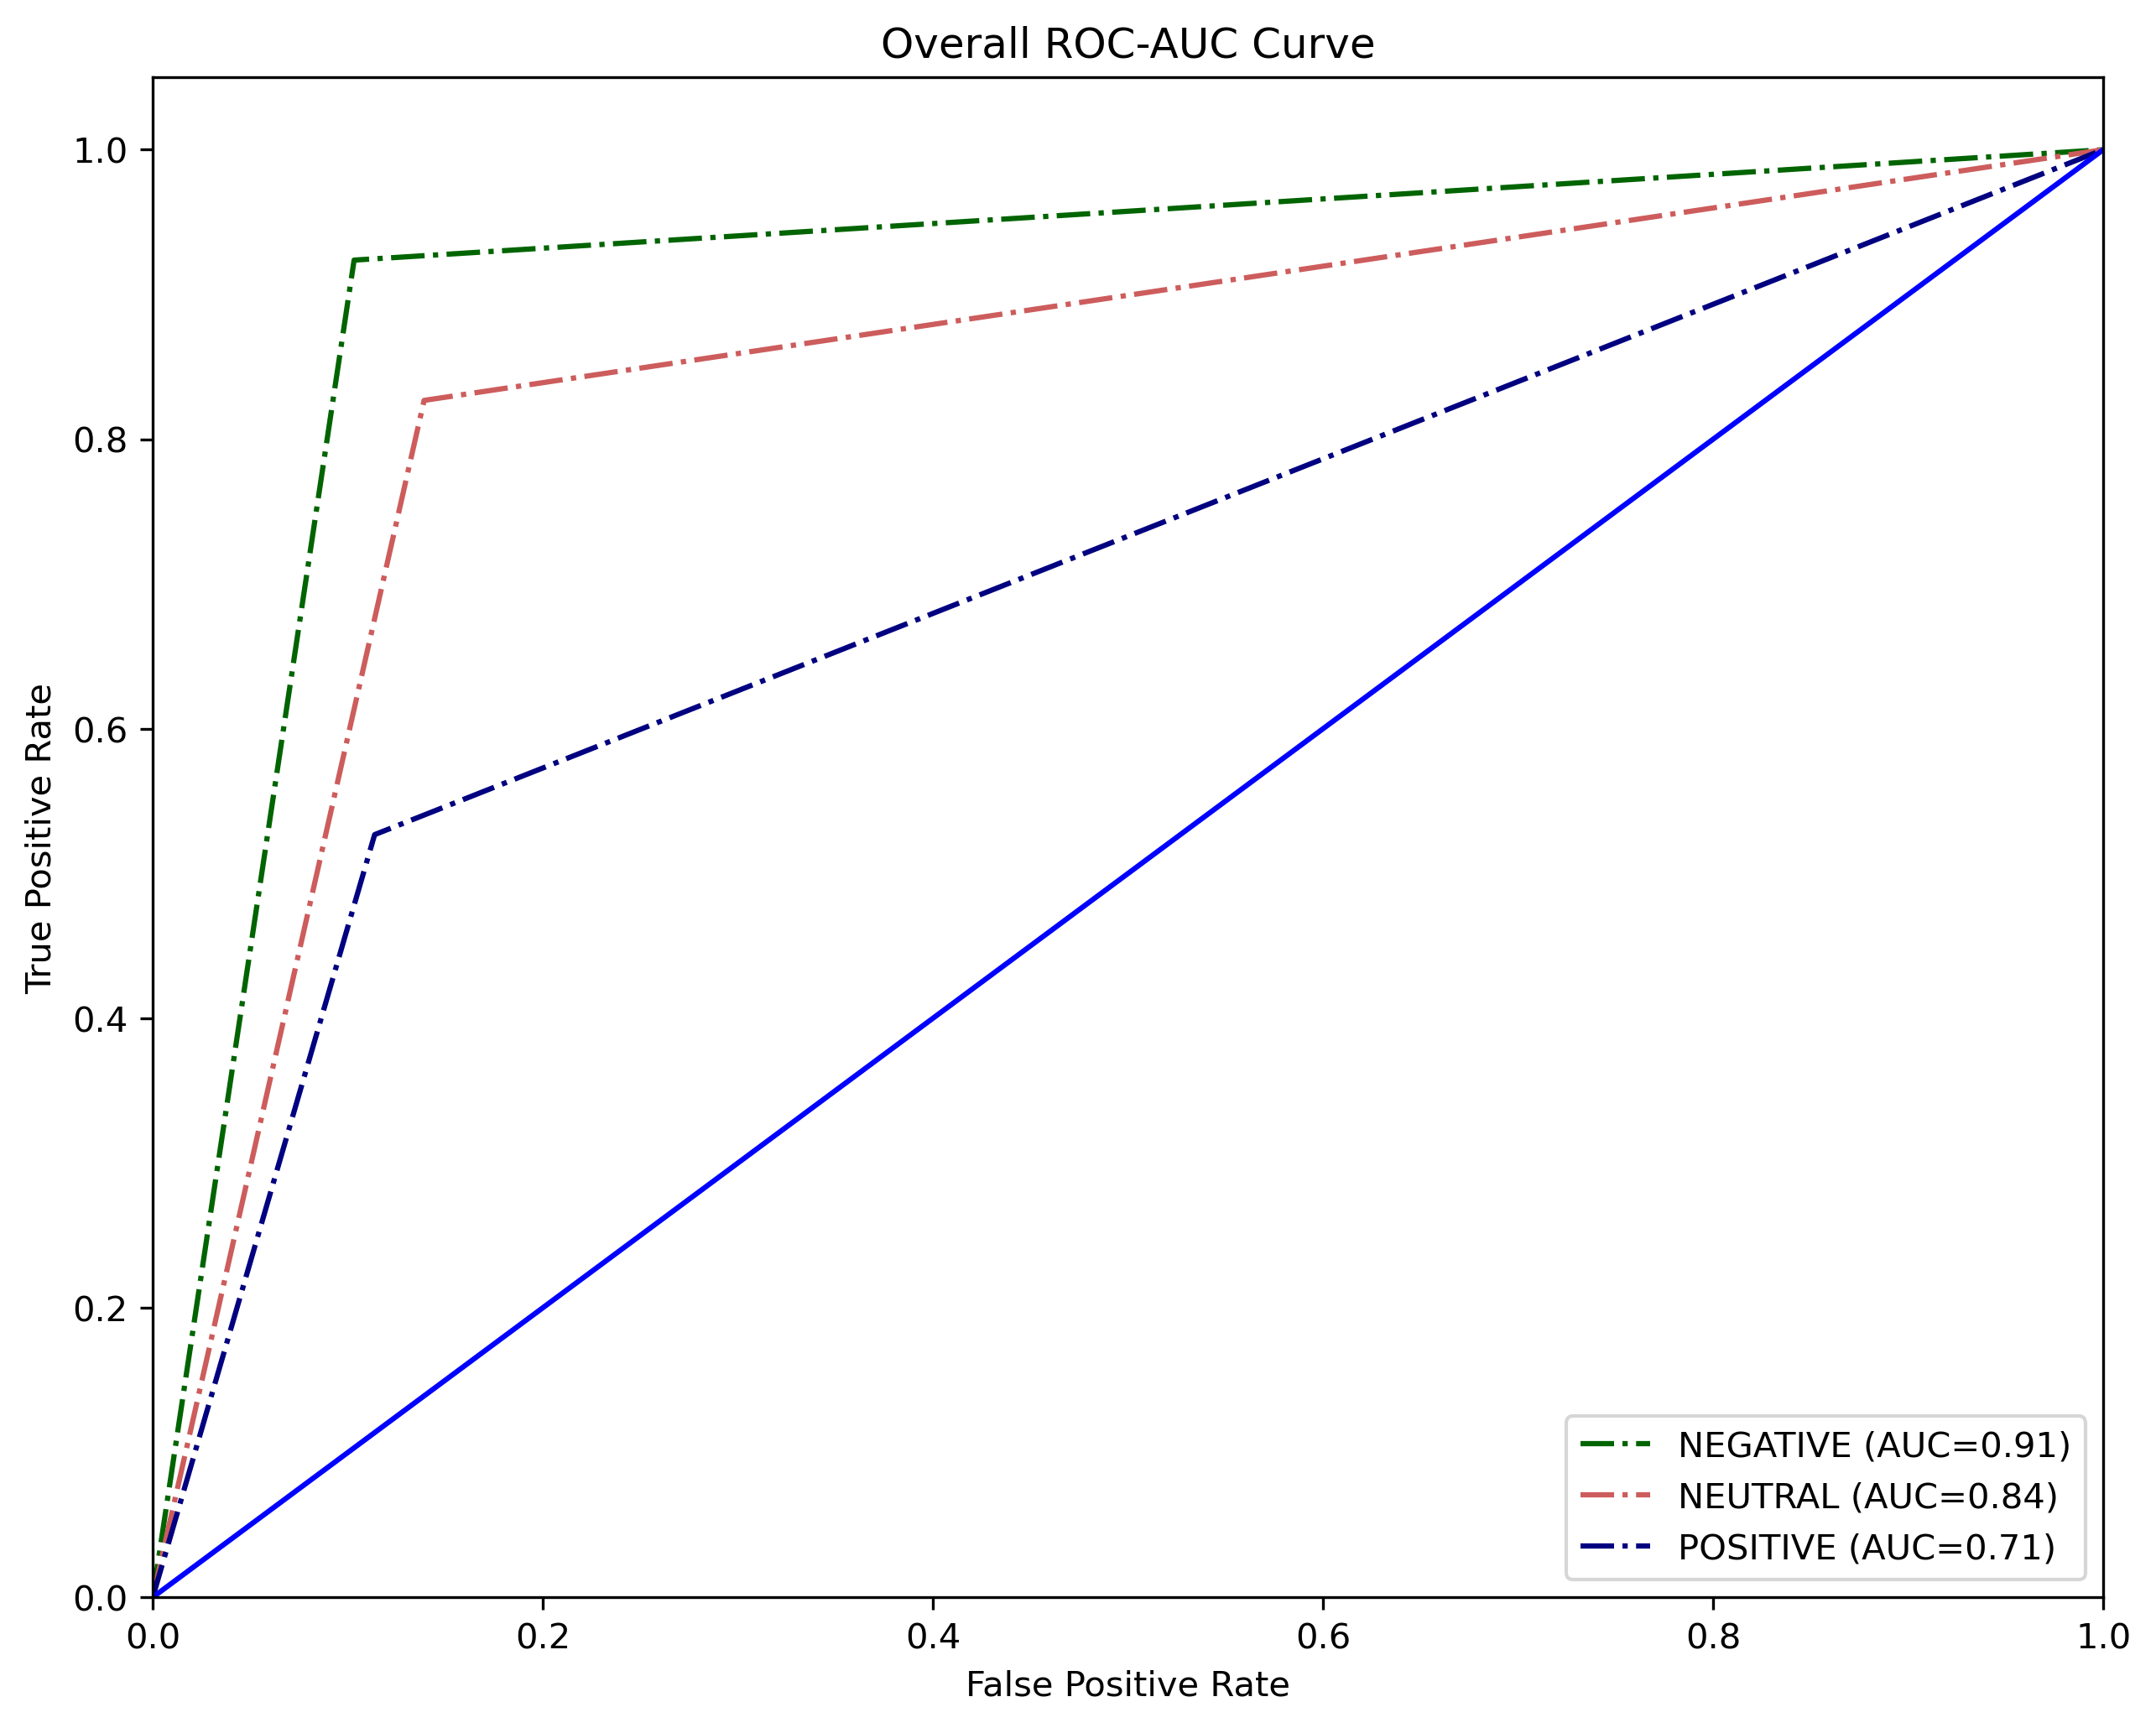

In [40]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y[:,i],y_new[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Overall ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Overall ROCAUC.png',dpi=300)